In [ ]:
#| include: false
!pip install palmerpenguins
!pip install shap
!pip install pycaret
import numpy as np
import pandas as pd
from palmerpenguins import load_penguins
from pycaret.classification import *
from pycaret.utils import check_metric
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 564 kB 20.3 MB/s 
     |████████████████████████████████| 288 kB 33.6 MB/s 
     |████████████████████████████████| 15.5 MB 47.6 MB/s 
     |████████████████████████████████| 1.7 MB 31.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 62.2 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 167 kB 59.5 MB/s 
     |████████████████████████████████| 6.8 MB 39.7 MB/s 
     |████████████████████████████████| 2.0 MB 54.1 MB/s 
     |████████████████████████████████| 113 kB 69.8 MB/s 
     |████████████████████████████████| 1.3 MB 39.9 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 596 kB 52.4 MB/s 
     |████████████████████████████████| 3.1 MB 45.2 MB/s 
     |████████████████

## Python Power Tools for Data Science

In this series of articles [Python Power Tools for Data Science](/#category=python-power-tools) I will be looking at a series of python tools that can make a significant improvement on common Data Science tasks. In particular, *Python Power Tools* are python tools that can significantly **automate** or **simplify** common tasks a Data Scientist would need to perform.

Automation and simplifcation of common tasks can bring many benefits such as:

- Less time needed to complete tasks
- Reduction of mistakes due to less complex code
- Improved readability and understanding of code
- Increased consistancy of approach to different problems
- Easier reproducability, verification, and comparison of results

## Pycaret

[Pycaret](https://pycaret.org) is a **low code** python library that aims to automate many tasks required for machine learning. Tasks that would usually take hundreds of lines of code can often be replaced with just a couple of lines. It was inspired by the *Caret* library in R.

> In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more. (Pycaret Documentation)

Pycaret has different modules specialised for different machine learning use-cases these include:   

- Classification
- Regression
- Clustering 
- Anomaly Detection
- Natural Language Processing
- Assocation Rule Mining
- Time Series

[See further articles about these other Pycaret modules and what they can offer](/#category=pycaret).

In this article to demonstrate the caperbilities of Pycaret we will use the **classification module** which has over 18 algorithms and 14 plots to analyze the results, plus many other features.

## Dataset - Palmer Penguins

We will use Pycaret on the [Palmer Penguins Dataset](https://github.com/allisonhorst/palmerpenguins) which contains size and other measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. We will use the Pycaret classification module to train a model to predict the penguin species category. Given there are 3 species of Penguin, this would be considered a [Multiclass classification problem](https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a)

![](https://github.com/pranath/blog/raw/master/images/penguin_types.png "Penguin Types (Artwork by @allison_horst)")

In [ ]:

# Load penguins dataset and show first few rows
penguins_df = load_penguins()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:

# Some more info on the data
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:

# Percentage of penguins of each species in dataset
penguins_df['species'].value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

![](https://github.com/pranath/blog/raw/master/images/penguin_measurements.png "Penguin Measurements (Artwork by @allison_horst)")

We can see that the dataset has different proportions of each penguin species.

The data consists of a mixture of numeric and categorical data, which should help us test the caperbilities of Pycaret with regards to the machine learning workflow.

## Data Preparation

We will split our data into a training and test subset of our data to validate our final trained classification model on, this needs to be done without the use of Pycaret. We will ensure that our training and testing subsets have the same proportion for each penguin species as the original dataset.

In [ ]:

# Split data into train/test and stratified on target class
X = penguins_df.iloc[:,1:]
Y = penguins_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.1)
train_df = X_train
train_df['species'] = y_train
test_df = X_test
test_df['species'] = y_test
# Verify datasets have same proportion of each penguin species as the original
print(train_df.shape)
print(test_df.shape)
print(train_df['species'].value_counts(normalize=True))
print(test_df['species'].value_counts(normalize=True))

(309, 8)
(35, 8)
Adelie       0.443366
Gentoo       0.359223
Chinstrap    0.197411
Name: species, dtype: float64
Adelie       0.428571
Gentoo       0.371429
Chinstrap    0.200000
Name: species, dtype: float64


## Pycaret workflow

### Setup

The Pycaret *setup()* is the first part of the workflow that always needs to be performed, and is a function that takes our data in the form of a pandas dataframe as well as the name of the target class to predict, and performs a number of tasks to get reading for the machine learning pipeline.

In [ ]:

# Prepare data for further processing
predict_penguin_species_experiment = setup(data = train_df, target = 'species', session_id=123) 

,Description,Value
0,session_id,123
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Adelie: 0, Chinstrap: 1, Gentoo: 2"
4,Original Data,"(309, 8)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


Calling the *setup()* function with one line of code does the following in the background:     

- Data types will be inferred for each column
- A table of key information about the dataset and configuration settings is generated
- Included in this table are the names of the target categories and the numbers they will be encoded as
- Based on the types inferred and configuration chosen, the dataset will be transformed to be ready for the machine learning algorithms
- Split the data into training and validation (test) sets

Various configuration settings are available, but defaults are selected so none are required. 

Some key configuration settings available include:     

- Missing numeric values are imputed (default: mean) iterative option uses lightgbm model to estimate values
- Missing categorical values are imputed (default: constant dummy value, alteratives include mode and iterative)
- Encode categorical values as ordinal e.g. ‘low’, ‘medium’, ‘high’
- High cardinality (default: false) options to compress to fewer levels or replace with frequency or k-means clustering derived class.
- Define date fields explictly
- Ignore fields for training models
- Normalise numeric fields (default: false) options include zscore, minmax, maxabs, robust
- Power transforms (default: false) will transform to make data more gaussian options include yeo-johnson, quantile
- PCA: Principal components analysis (default: false) reduce the dimensionality of the data down to a specified number of components
- Remove outliers from training data (using SVD)
- Remove features with high correlations with each other
- Create cluster category based on data
- Automatic feature selection (using ensemble models to identify best features)
- Fix target class imbalance using SMOTE synthentic data generation or resampling
- Stratify train-test split of datasetby target variable
- Various cross-validation strategies for splitting data for model training

### Comparing All Models

In Pycaret we can use a single line command *compare_models()* to train 14 different classification models on our data with default parameters to find the best model. Each model is trained using cross-fold validation accross multiple folds (default 10) and the average metric scores for multiple classification metrics are shown, including Accuracy, F1, etc.

The results are shown in a grid, ranked by highest scoring on Accuracy by default.

In [ ]:

# Train all classification models on data with default parameters using cross-fold validation
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9955,0.0000,0.9917,0.9959,0.9952,0.9927,0.9930,0.013
lda,Linear Discriminant Analysis,0.9955,1.0000,0.9917,0.9959,0.9952,0.9927,0.9930,0.016
lr,Logistic Regression,0.9907,1.0000,0.9875,0.9916,0.9905,0.9852,0.9858,0.423
rf,Random Forest Classifier,0.9814,0.9988,0.9755,0.9832,0.9811,0.9706,0.9716,0.464
et,Extra Trees Classifier,0.9814,0.9987,0.9717,0.9840,0.9810,0.9701,0.9715,0.460
lightgbm,Light Gradient Boosting Machine,0.9766,0.9996,0.9721,0.9797,0.9765,0.9630,0.9643,0.090
gbc,Gradient Boosting Classifier,0.9721,0.9974,0.9630,0.9761,0.9708,0.9556,0.9580,0.250
dt,Decision Tree Classifier,0.9580,0.9685,0.9565,0.9638,0.9584,0.9353,0.9375,0.015
ada,Ada Boost Classifier,0.9494,0.9772,0.9356,0.9574,0.9486,0.9202,0.9241,0.093
nb,Naive Bayes,0.8333,0.9958,0.8726,0.9139,0.8388,0.7522,0.7853,0.016


We can see that the Extra Trees Classifier is the best performing model, which we would normally choose. For this example we will select a model that performs less well so has some mistakes, which will be useful later - so we will choose to use the Randon Forrest (rf) classifier.

### Selecting and Fine Tuning the Model

So we will create a Random Forrest Model. When we do this, it will train the model on the training data, using cross-fold validation (default 10 folds) and show the metrics for each fold iteration. This will train our model with default parameters, so should give us the same result as we observed in the compare models process.

In [ ]:

# Create and train the random forrest model on our data
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9545,1.0000,0.9167,0.9591,0.9525,0.9269,0.9302
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9545,0.9880,0.9167,0.9591,0.9525,0.9269,0.9302
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9048,1.0000,0.9213,0.9143,0.9058,0.8521,0.8552


We can also print some details about our trained model.

In [ ]:

# Print model summary
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


We can now fine tune our model to optimise parameters to get our best model using *tune_model*. This process uses *Random Grid Search* to find the best combination of parameters that produces the highest score. This will output the results of the cross-fold validation from our best model.

In [ ]:

# Fine tune our model using Random Grid Search on parameters
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9545,1.0000,0.9167,0.9591,0.9525,0.9269,0.9302
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9545,0.9819,0.9167,0.9591,0.9525,0.9269,0.9302
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9524,0.9893,0.9630,0.9619,0.9536,0.9263,0.9297


We can observe that the grid search has improved our model Accuracy.

### Model Evaluation

Once we have our best model, it's normal practice to look at the details of how its performing, what classification errors it makes, and what it gets correct.e can do this through a series of plots. The *plot_model()* function in Pycaret allows us to easily display a range of these plots to help with this.

A *confusion matrix* is a very common plot to show the details of classification predicted vs actual results which we can plot with one line.

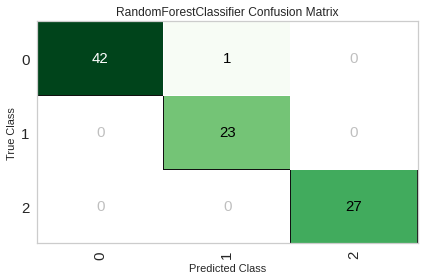

In [ ]:

# Plot confusion matrix 
plot_model(tuned_rf, plot = 'confusion_matrix')

We can see that our fine-tuned model only makes one mistake, predicting a penguin of class 0 as a class 2 penguin. Referring to our table from the *setup()* function we can see that the penguin species target class has the following number encodings:

- Adelie: 0
- Chinstrap: 1
- Gentoo: 2

So it has predicted a Adelie penguin as a Gentoo penguin! 

We can also plot a decision boundry for the model to see how it divides the parameter space to be able to classify the penguins.

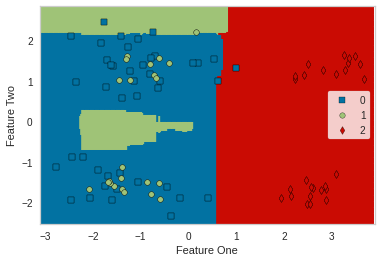

In [ ]:

# Plot model descision boundary
plot_model(tuned_rf, plot='boundary')

We can see that for class 2 (Gentoo) penguins, there is a well defined decision boundry. However the decision boundry between the Adelie and Chinstrap penguins is more messy, implying its harder to distinguish between these two types of penguins. We will make a note of this for later.

We can also total up the errors in a error bar plot in Pycaret.

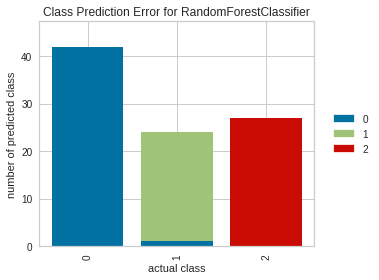

In [ ]:

# Plot class prediction error bar plot
plot_model(tuned_rf, plot = 'error')

Here we can see our one case of an Adelie penguin (blue/0) predicted as a Gentoo penguin (red/2) again.

Another common plot when trying to understand how our model works is a feature importance plot. This plot will show us the most important features for the model to be able to predict the penguin species class.

Again we can create this plot with one line of Pycaret.

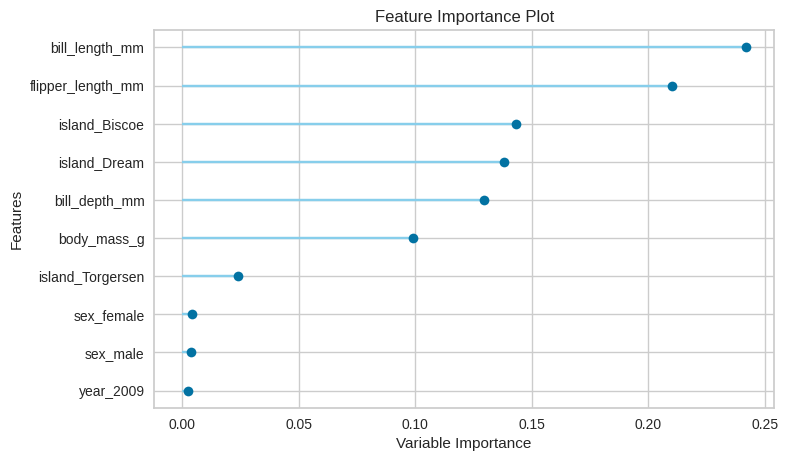

In [ ]:

# Plot feature importance
plot_model(tuned_rf, plot = 'feature')

So it seems like bill length and flipper length are two of the most important features to help predict penguin species.

The *interpret_model()* function is available to use a **Game Theory** approach on the model predictions on training data to explain the output of the model. This is mostly based upon the python [SHAP](https://shap.readthedocs.io/en/latest/index.html) package. However this can only be used with tree-based models, which is why we deliberately chose the Random Forrest classifier earlier to be able to demonstrate this feature.

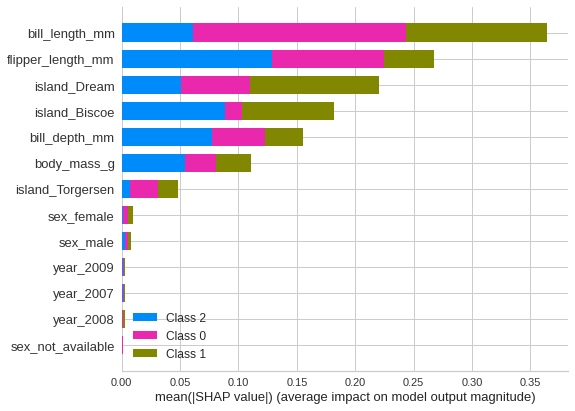

In [ ]:

# Plot shapley values for model interpretation
interpret_model(tuned_rf)

### Prepare Model for Use

Once we are happy with our final model, we can prepare it for us with a range of functions. We can create our final model for deployment using the *finalise_model()* function, which will train the model on the entire training dataset.

In [ ]:

# Train final model on all training data
final_rf = finalize_model(tuned_rf)
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


We can now test our final model on the holdout dataset we kept at the start, to get further confirmation of its performance. We can use the *predict_model()* function using our final model and the holdout test dataset to generate a set if predictions.

This will also automatically apply any data transformations we configured in our *setup()* function to this new test dataset before the data is passed to the model.

In [ ]:

# Use holdout test dataset to generate predictions for final model
new_predictions = predict_model(final_rf, data=test_df)
new_predictions.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species,Label,Score
263,Biscoe,49.8,15.9,229.0,5950.0,male,2009,Gentoo,Gentoo,0.9857
216,Biscoe,45.8,14.2,219.0,4700.0,female,2008,Gentoo,Gentoo,0.9802
68,Torgersen,35.9,16.6,190.0,3050.0,female,2008,Adelie,Adelie,0.9280
55,Biscoe,41.4,18.6,191.0,3700.0,male,2008,Adelie,Adelie,0.9251
206,Biscoe,46.5,14.4,217.0,4900.0,female,2008,Gentoo,Gentoo,0.9851


Note the predicted penguin class is in the newly created **Label** column. The actual penguin species is still in the original **species** column. We can use Pycaret's utility *check_metric()* function to apply a metric to our predictions, in this case we will calculate the F1 classification metric.

In [ ]:

# Evaluate final model on test dataset predictions
check_metric(new_predictions['species'], new_predictions['Label'], metric = 'F1')

1.0

So we can see our final model has performed exteremely well on our holdout test data, getting a perfect score of 1.0.

We can now save our final model using the *save_model()* function.

In [ ]:

# Save final model (and data transformation pipeline process)
save_model(final_rf,'Final Penguin Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=4,
                                         max_featur

Our saved model is easily re-loaded for use using the *load_model()* function. Note this also loads any data transformation configured as well specifed in our original *setup()* function.

In [ ]:

# Load final model (and data transformation pipeline process)
saved_final_rf = load_model('Final Penguin Model')

Transformation Pipeline and Model Successfully Loaded


## Review

Overall, Pycaret is an incredibly useful and powerful library for speeding up and automating the machine learning pipeline and process. Lets highlight some key pros and cons.

### Pros

**Less code**: The library really lives up to its motto of being a 'low code' library, often one of code will replace what would normally have been an entire manually coded process of many lines of code. Accross a whole project, as we have seen in this example project, hundreds of lines of code can be replace by just a few lines. Note how most of this article length is more due to describing what the code does, than the code itself!

**Easy to use**: Pycaret library functions are well named, intiutive and easy to use, and easy to customise and configure.

**A more consistant approach**: Another benefit of being a low code library where most processes have been automated is that this ensures a more consistant approach when using Pycaret accross different projects. This is important not only for scientific reproducability, but for reducing the possibility of errors that are more likely when more custom and manual code is required to be written for a process.

**Good practice**: Each step of the machine learning pipeline that Pycaret simplifies and automates for you, does so in such a way to bake in best practice in Data Science. For example, when testing models cross-fold validation is done by default on all models. When evaluating models, multiple and relevant metrics are used to evaluate performance.

**Performs all key tasks and more**: Pycaret automates every key task in machine learning process, from wrangling to preparing your data, for selecting a model, for optimising and evaluating a final model, then testing and saving a model ready for deployment and use. In addition, Pycaret offers easy access to extra functions while not always required, can be useful for particular projects - for example the ability to calculate Shapley values as we have seen for model interpretability.

**Educational**: Using this library helps all kinds of users, from amateurs to professional Data Scientists, keep up to date with the latest methods and techniques. For example, Pycaret maintains a list of the most widely used models which are included automatically when selecting a potential model. For model understanding and interpretation, a wide range of plots and analyses are available. I was not fully aware for example about Shapley values, and how they can help interpret models from a very different perspective. These are some of the many advantages of having an open source library like Pycaret that's intended to automate the Data Science process, everyone's collaberative effort to use and update the library helps keep highlighting and providing some of the latest and best techniques to all who use it.

**Excellent data wrangling and transformation**: As we saw with the *setup()* function there are many useful features available to perform many common tasks that would normally require many lines of code. For example, the inclusion of the SMOTE and resampling techniques often used to correct for imbalances in the target variable in a dataset. Sensible automatic imputation methods by default to deal with missing values, and normalisation methods to scale and prepare numeric data - are key common tasks that need to be performed, expertly automated by the Pycaret library.

**Quick consideration of a wide range of models**: Pycaret's *compare_models(), create_model() and tune_model()* functions allow you to quickly compare a wide range of the best models available (currently 18), then select and optimise the best model - in just 3 lines of code.

**Creating a pipeline not just a model**: The machine learning process is not just about producing a good model, you also need a process to transform the data into a format required for that model. This is often consider a separate bit of extra work, often referred to as an ETL process. (Extract, Transform & Load). Pycaret blends these two essential things together for you, another benefit of the automation it provides, so when you save your model, you also save this data transformation process, all together. And when you load it ready for use, you load the data transformation and the model together - ready for immediate use - a huge saving of time and effort.

These are just some of the key pros of the Pycaret library, in my opinion there are many many more. To illustrate what a huge advance and benefit the Pycaret library is in the pros highlighted, compare this to [a previous machine learning project of mine to classify breast cancer data](https://github.com/pranath/breast_cancer_prediction/blob/master/breast_cancer_prediction2.ipynb), where I used the common and more manual process of many more lines of code for each part of the machine learning pipeline.

### Cons

**Not good for beginners**: Despite being pitched for begginners, this library may not be ideal for beginners in my opinion. While the functions are easy for a beginner to use, and indeed as highlighted you can run the entire machine learning process very easily, I would say this can be a bit deceptive and misleading. Simply running the process with little understanding what is going on underneath, is not a substitute for understanding the basics. For example when, why & how should we transform data? (e.g. normalisation of numeric values) which is the most appropriate metric to interpret results? (e.g. balanced vs imbalanced target variable). 

**No ability to customose plots**: This is perhaps a minor issue, but it would be nice to be able to customise plots at least a little for example to adjust the size of plots.

**Can't easily see what is going on under the hood**: In a way, this is I feel both a Pro and a Con. If you know what is going on with these automated functions underneath, then to some extent it can be nice to not be overloaded with lots of detail about it. On the other hand, for both experienced Data Scientist's and begginners it can be helpful to actually understand more of what each automated function is doing. Many functions do give some insight as to what they are doing, but many things are hidden - and can only be discovered by reading the documentation, which I would suggest is a good idea for anyone using this library, experienced or not. But again I feel this is a relatively minor con, as its a difficult balance to achieve in the trade off between simplifying and automating the process vs making every part of the process transparent.

## Conclusion

In this article we have looked at Pycaret as a potential [Python Power Tool for Data Science](/#category=python-power-tools).

While it does have some minor drawbacks in my view, overall I would say Pycaret is an incredibly useful and powerful tool that helps simplify the machine learning process. I will be using Pycaret from now on in my day to day Data Science work by default - I'm hugely impressed by this library and its ongoing development.

In my honest opinion, I have no doubt in declaring the Pycaret is indeed a **Python Power Tool for Data Science**.